In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
adata_obs = pd.read_csv('/kaggle/input/open-problems-single-cell-perturbations/adata_obs_meta.csv')
id_map = pd.read_csv('/kaggle/input/open-problems-single-cell-perturbations/id_map.csv')
multiome_obs = pd.read_csv('/kaggle/input/open-problems-single-cell-perturbations/multiome_obs_meta.csv')
multiome_var = pd.read_csv('/kaggle/input/open-problems-single-cell-perturbations/multiome_var_meta.csv')
de_train = pd.read_parquet('/kaggle/input/open-problems-single-cell-perturbations/de_train.parquet')

In [3]:
adata_obs.head()

,obs_id,library_id,plate_name,well,row,col,cell_id,donor_id,cell_type,sm_lincs_id,sm_name,SMILES,dose_uM,timepoint_hr,control
0,000006a87ba75b72,library_4,plate_4,F7,F,7,PBMC,donor_2,T cells CD4+,LSM-4944,MLN 2238,CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,1.0,24,False
1,0000233976e3cd37,library_0,plate_3,D4,D,4,PBMC,donor_1,T cells CD4+,LSM-46203,BMS-265246,CCCCOc1c(C(=O)c2c(F)cc(C)cc2F)cnc2[nH]ncc12,1.0,24,False
2,0001533c5e876362,library_2,plate_0,B11,B,11,PBMC,donor_0,T regulatory cells,LSM-45663,Resminostat,CN(C)Cc1ccc(S(=O)(=O)n2ccc(/C=C/C(=O)NO)c2)cc1,1.0,24,False
3,00022f989630d14b,library_35,plate_2,E6,E,6,PBMC,donor_0,T cells CD4+,LSM-43216,FK 866,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,1.0,24,False
4,0002560bd38ce03e,library_22,plate_4,B6,B,6,PBMC,donor_2,T cells CD4+,LSM-1099,Nilotinib,Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)...,1.0,24,False


In [4]:
adata_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240090 entries, 0 to 240089
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   obs_id        240090 non-null  object 
 1   library_id    240090 non-null  object 
 2   plate_name    240090 non-null  object 
 3   well          240090 non-null  object 
 4   row           240090 non-null  object 
 5   col           240090 non-null  int64  
 6   cell_id       240090 non-null  object 
 7   donor_id      240090 non-null  object 
 8   cell_type     240090 non-null  object 
 9   sm_lincs_id   240090 non-null  object 
 10  sm_name       240090 non-null  object 
 11  SMILES        240090 non-null  object 
 12  dose_uM       240090 non-null  float64
 13  timepoint_hr  240090 non-null  int64  
 14  control       240090 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 25.9+ MB


In [5]:
de_train.head()

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629


In [6]:
de_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Columns: 18216 entries, cell_type to ZZEF1
dtypes: bool(1), float64(18211), object(4)
memory usage: 85.3+ MB


In [7]:
# Convert data types to strings
data_types_counts = adata_obs.dtypes.astype(str).value_counts()
fig = go.Figure(data=[go.Pie(labels=data_types_counts.index, values=data_types_counts.values)])
fig.update_layout(title_text="Data Types Distribution")
fig.show()

In [8]:
ax = px.histogram(adata_obs,x="control",marginal="box",title="Control")
ax.update_layout(bargap=0.2)

************************************************
 sm_name
Dimethyl Sulfoxide     28462
Dabrafenib             26346
Belinostat             24059
LDN 193189              1939
Porcn Inhibitor III     1900
                       ...  
ABT737                   655
BMS-387032               416
UNII-BXU45ZH6LI          307
CGP 60474                 89
Alvocidib                 51
Name: count, Length: 147, dtype: int64 
************************************************


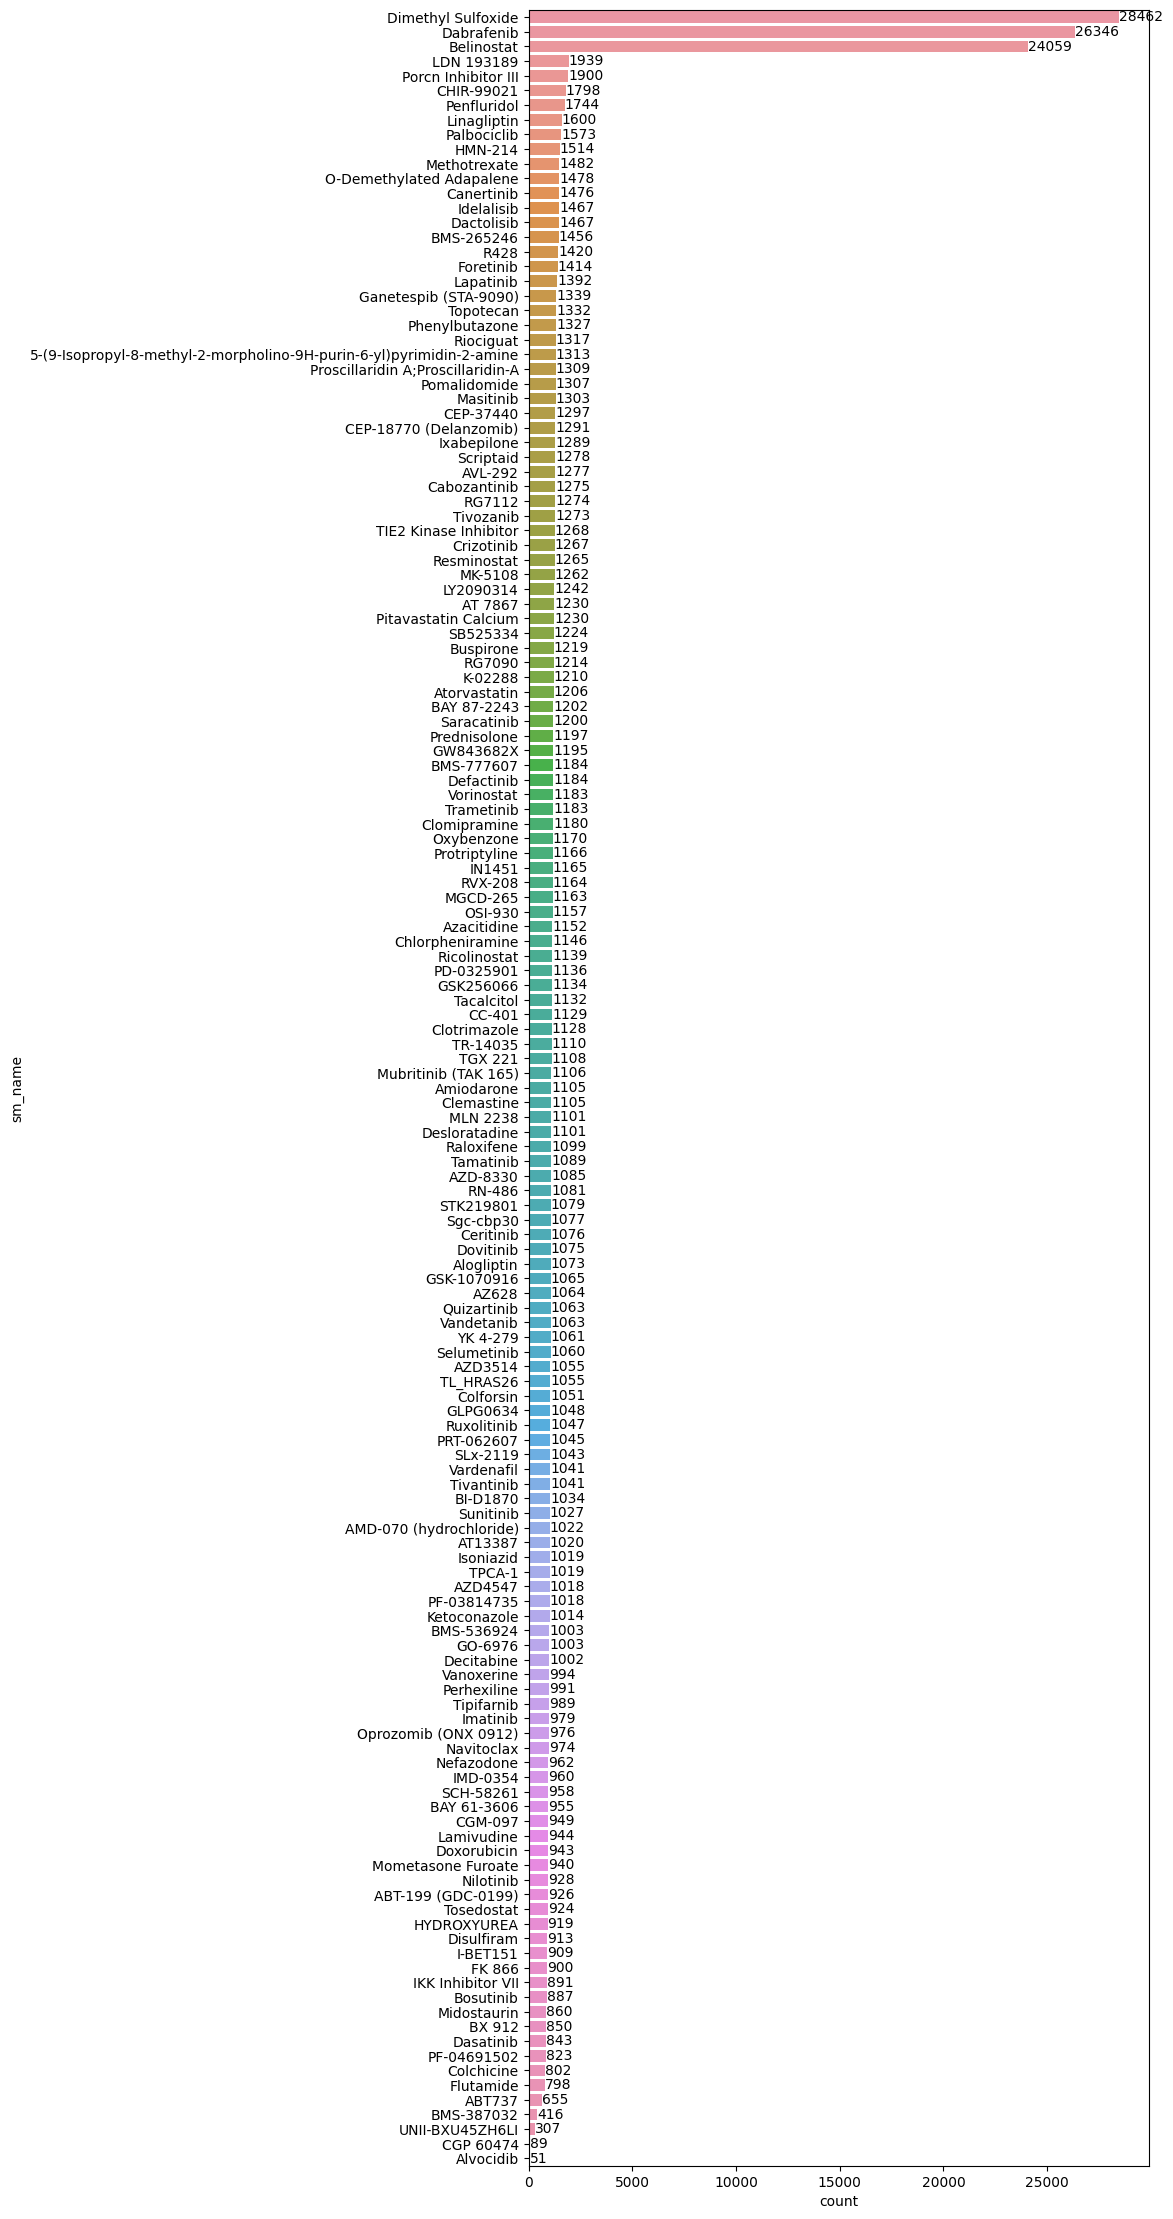

In [9]:
print('************************************************\n',adata_obs['sm_name'].value_counts(), '\n************************************************')
plt.figure(figsize=(8, 28))
ax = sns.countplot(data=adata_obs, y="sm_name", order=adata_obs['sm_name'].value_counts().index[0:])
ax.bar_label(ax.containers[0])
plt.show()

************************************************
 cell_type
T cells CD4+          124971
NK cells               59170
Myeloid cells          16661
T cells CD8+           15563
B cells                15485
T regulatory cells      8240
Name: count, dtype: int64 
************************************************


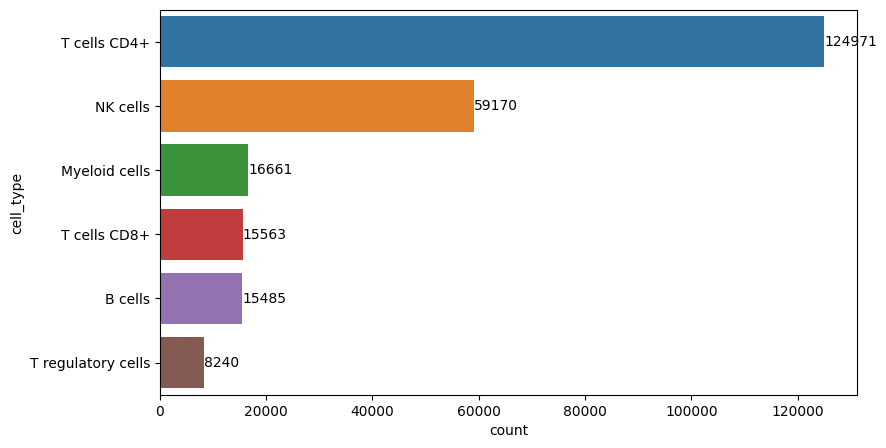

In [10]:
print('************************************************\n',adata_obs['cell_type'].value_counts(), '\n************************************************')
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=adata_obs, y="cell_type", order=adata_obs['cell_type'].value_counts().index[0:])
ax.bar_label(ax.containers[0])
plt.show()

# SMILES (Simplified Molecular Input Line Entry System)

In [11]:
adata_obs['SMILES'][7]

'O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO'

In [12]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
from rdkit import Chem
from rdkit.Chem import Draw

In [14]:
# Your SMILES string
smiles = "CCCCOc1c(C(=O)c2c(F)cc(C)cc2F)cnc2[nH]ncc12"

# Convert the SMILES string to an RDKit molecule object
mol = Chem.MolFromSmiles(smiles)

# Check if the conversion was successful
if mol is not None:
    # Generate a 2D depiction of the molecule
    img = Draw.MolToImage(mol)    
    # Save the image to a file
    img.save("molecule.png")
else:
    print("Invalid SMILES string")


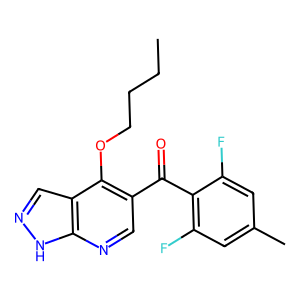

In [15]:
img

In [16]:

# Your SMILES string
smiles = 'O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO'

# Convert the SMILES string to an RDKit molecule object
mol = Chem.MolFromSmiles(smiles)

# Check if the conversion was successful
if mol is not None:
    # Generate a 2D depiction of the molecule
    img_1 = Draw.MolToImage(mol)    
    # Save the image to a file
    img_1.save("molecule.png")
else:
    print("Invalid SMILES string")

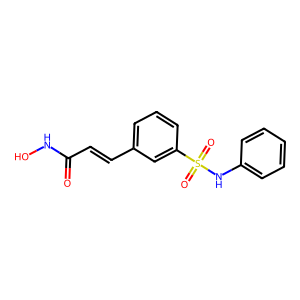

In [17]:
img_1